In [10]:
import torch
from d2l import torch as d2l

In [11]:
def softmax(X): 
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdims=True)
  return X_exp / partition

In [12]:
class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    
    self.W = torch.normal(0, sigma, size=(self.num_inputs, self.num_outputs),
                          requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad=True)

  def parameters(self):
    return [self.W, self.b]

In [13]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
  X = X.reshape((-1, self.W.shape[0]))
  return softmax(torch.matmul(X, self.W) + self.b)

In [ ]:
def cross_entropy(y_hat, y):
  return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()  

In [15]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

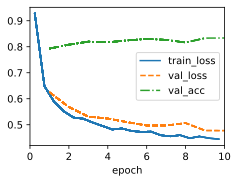

In [16]:
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [18]:
X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

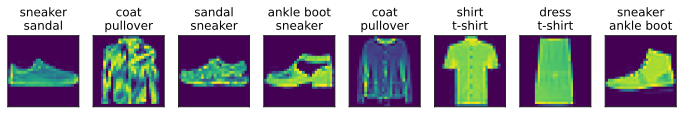

In [19]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

### Exercises

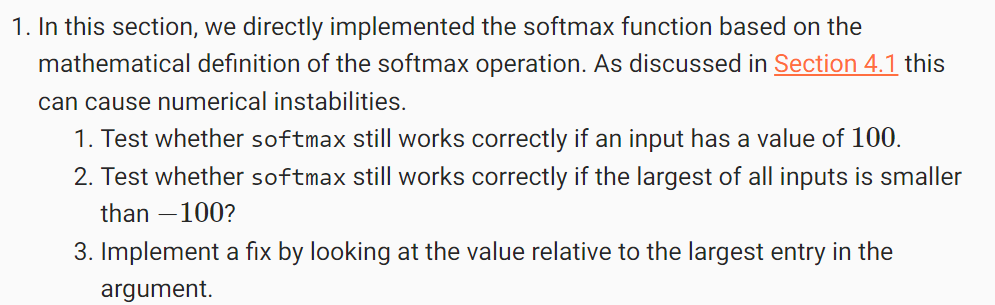

In [29]:
X = torch.tensor([1, 4, -3, 100]).unsqueeze(dim=0)

softmax(X)

tensor([[0., 0., 0., nan]])

In [30]:
X = torch.tensor([1, 4, -3, -100]).unsqueeze(dim=0)

softmax(X)

tensor([[4.7385e-02, 9.5175e-01, 8.6788e-04, 0.0000e+00]])

In [46]:
def fixed_softmax(X):
  max_val_col, _ = X.max(dim=1, keepdim=True)
  
  X -= max_val_col
  X_exp = torch.exp(X)
  partition = X_exp.sum(1, keepdims=True)
  return X_exp / partition

In [47]:
X = torch.tensor([
  [1, 4, -3, 100],
  [1, 4, -3, 100],
  [1, 4, -3, 100]
])

fixed_softmax(X)

tensor([[1.0089e-43, 2.0305e-42, 1.4013e-45, 1.0000e+00],
        [1.0089e-43, 2.0305e-42, 1.4013e-45, 1.0000e+00],
        [1.0089e-43, 2.0305e-42, 1.4013e-45, 1.0000e+00]])

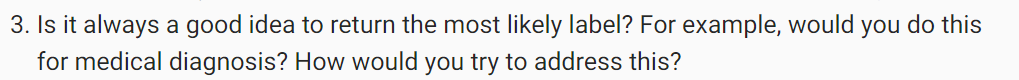

Actually, this is not the best idea in some cases, especially in medicene. For exampple, the probability of some diagnosis can be very close, for example 20% and %20.5 and model will choose second option, however this can be not true. So, in order to do not make this mistakes, we want to see probability for all classes, and see how one dominates other.

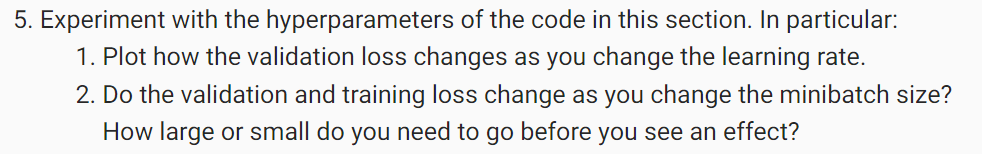

KeyboardInterrupt: 

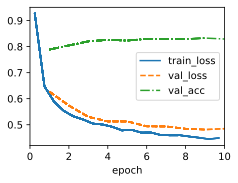

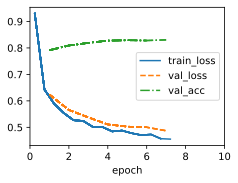

In [49]:
for lr in [0.0001, 0.001, 0.1]:
  data = d2l.FashionMNIST(batch_size=256)
  model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
  trainer = d2l.Trainer(max_epochs=10)
  trainer.fit(model, data)

In [ ]:
for batch_size in [32, 64, 128, 256, 512]:
  data = d2l.FashionMNIST(batch_size=256)
  model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
  trainer = d2l.Trainer(max_epochs=10)
  trainer.fit(model, data)